In [1]:
import pandas as pd
import numpy as np

# Function to determine betrayal risk based on features including age
def calculate_betrayal_risk(row):
    risk_score = 0
    
    # High risk if income percentile is low, disciplinary record is high, near the border, low comrades, or family history
    if row['Income_Percentile'] < 0.4:
        risk_score += 1
    if row['Disciplinary_Record'] > 3:
        risk_score += 1
    if row['Proximity_to_Border'] > 0.7:
        risk_score += 1
    if row['Comrades_Count'] < 6:
        risk_score += 1
    if row['Family_History_of_Betrayal'] == "Yes":
        risk_score += 1

    # Adding age factor
    if 30 <= row['Age'] <= 50:  # Middle-aged people are at higher risk
        risk_score += 1
    elif row['Age'] < 18 or row['Age'] > 60:  # Young kids and old soldiers are at lower risk
        risk_score -= 1
    
    # Risk is "Yes" (betrayal) if score is above 3, otherwise "No" (no betrayal)
    return "Yes" if risk_score >= 3 else "No"

# Generate 100 soldiers with realistic feature relationships including age
np.random.seed(42)

data_with_age = {
    'Soldier_ID': ['S' + str(i) for i in range(1, 1001)],
    'Income_Percentile': np.round(np.random.uniform(0.1, 1.0, 1000), 2),
    'Disciplinary_Record': np.random.randint(0, 6, 1000),
    'Proximity_to_Border': np.round(np.random.uniform(0.2, 1.0, 1000), 2),
    'Comrades_Count': np.random.randint(3, 15, 1000),
    'Family_History_of_Betrayal': np.random.choice(["Yes", "No"], 1000),  # Changing to "Yes" or "No"
    'Age': np.random.randint(16, 70, 1000)  # Adding age, soldiers between 16 and 70 years old
}

# Convert to DataFrame
df_with_age = pd.DataFrame(data_with_age)

# Apply the function to calculate betrayal risk based on features, including age
df_with_age['Betrayal_Risk'] = df_with_age.apply(calculate_betrayal_risk, axis=1)

# Save as CSV file
file_path_with_age = 'troop_betrayal.csv'
df_with_age.to_csv(file_path_with_age, index=False)

file_path_with_age

'troop_betrayal.csv'

In [12]:
df=pd.read_csv("troop_betrayal.csv")
df.reset_index(drop=True, inplace=True)
df.to_csv("output.csv", index=False)
df=pd.read_csv("output.csv")
df.head(10)

,Soldier_ID,Income_Percentile,Disciplinary_Record,Proximity_to_Border,Comrades_Count,Family_History_of_Betrayal,Age,Betrayal_Risk
0,S1,0.44,3,0.56,11,No,16,No
1,S2,0.96,5,0.68,8,Yes,16,No
2,S3,0.76,2,0.61,13,No,57,No
3,S4,0.64,4,0.94,8,No,69,No
4,S5,0.24,0,0.60,10,No,57,No
5,S6,0.24,4,0.99,8,Yes,36,Yes
6,S7,0.15,5,0.88,3,Yes,30,Yes
7,S8,0.88,5,0.37,6,No,32,No
8,S9,0.64,0,0.94,9,Yes,37,Yes
9,S10,0.74,1,0.29,4,No,53,No


In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load the dataset
df_with_age = pd.read_csv('troop_betrayal.csv')

# Encode 'Yes'/'No' as 1/0 for the target column 'Betrayal_Risk'
df_with_age['Betrayal_Risk'] = df_with_age['Betrayal_Risk'].map({'Yes': 1, 'No': 0})

# Encode 'Yes'/'No' as 1/0 for the 'Family_History_of_Betrayal' column
df_with_age['Family_History_of_Betrayal'] = df_with_age['Family_History_of_Betrayal'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df_with_age[['Income_Percentile', 'Disciplinary_Record', 'Proximity_to_Border', 'Comrades_Count', 'Family_History_of_Betrayal', 'Age']]
y = df_with_age['Betrayal_Risk']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Start the timer
start_time = time.time()

# Train the model
train_start_time = time.time()
rf_model.fit(X_train, y_train)
train_end_time = time.time()

# Predict probabilities for the test set
predict_start_time = time.time()
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (betrayal)
y_pred_rf = rf_model.predict(X_test)
predict_end_time = time.time()

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate time metrics
train_time_rf = train_end_time - train_start_time
predict_time_rf = predict_end_time - predict_start_time
total_time_rf = time.time() - start_time

# Print the results for each row (probabilities)
probability_df_rf = pd.DataFrame({
    'Soldier_ID': df_with_age['Soldier_ID'][y_test.index].values,
    'Probability_of_Betrayal': y_pred_proba_rf
})
print(probability_df_rf.to_string(index=False))


Soldier_ID  Probability_of_Betrayal
      S522                     0.11
      S738                     0.40
      S741                     0.53
      S661                     0.02
      S412                     0.07
      S679                     0.03
      S627                     0.85
      S514                     0.95
      S860                     0.48
      S137                     0.00
      S812                     0.30
       S77                     0.02
      S637                     0.06
      S974                     0.73
      S939                     0.18
      S900                     0.26
      S281                     0.07
      S884                     0.85
      S762                     0.96
      S320                     0.99
      S550                     0.04
      S175                     0.57
      S372                     0.36
      S528                     0.37
      S211                     0.09
      S236                     0.21
      S102                  

In [5]:
# Print the evaluation metrics and times
print("\nRandom Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Time to Train: {train_time_rf:.4f} seconds")
print(f"Time to Predict: {predict_time_rf:.4f} seconds")
print(f"Total Time: {total_time_rf:.4f} seconds")


Random Forest Model Evaluation Metrics:
Accuracy: 0.9400
Recall: 0.8696
Precision: 0.9524
F1-Score: 0.9091
Time to Train: 0.1851 seconds
Time to Predict: 0.0150 seconds
Total Time: 0.2113 seconds


In [17]:
betrayal_counts = df_with_age['Betrayal_Risk'].value_counts()

print("Number of Betrayal = Yes:", betrayal_counts.get(1, 0))  # Count of 'Yes' (betrayal)
print("Number of Betrayal = No:", betrayal_counts.get(0, 0))

Number of Betrayal = Yes: 360
Number of Betrayal = No: 640


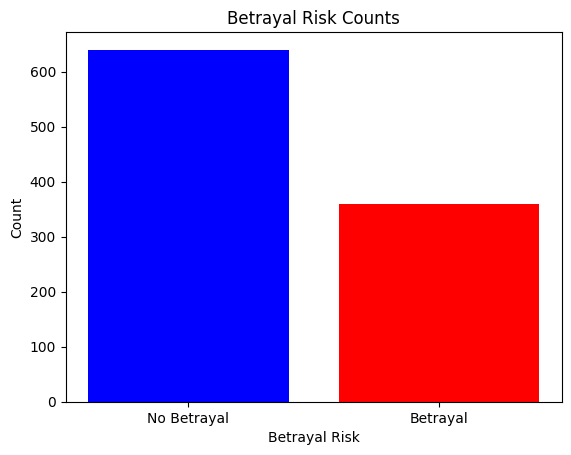

In [14]:
import matplotlib.pyplot as plt

# Get the value counts
betrayal_counts = df_with_age['Betrayal_Risk'].value_counts()

# Define the labels and values for the histogram
labels = ['No Betrayal', 'Betrayal']
values = [betrayal_counts.get(0, 0), betrayal_counts.get(1, 0)]

# Plot the histogram
plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Betrayal Risk')
plt.ylabel('Count')
plt.title('Betrayal Risk Counts')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load the dataset
df_with_age = pd.read_csv('troop_betrayal.csv')

# Encode 'Yes'/'No' as 1/0 for the target column 'Betrayal_Risk'
df_with_age['Betrayal_Risk'] = df_with_age['Betrayal_Risk'].map({'Yes': 1, 'No': 0})

# Encode 'Yes'/'No' as 1/0 for the 'Family_History_of_Betrayal' column
df_with_age['Family_History_of_Betrayal'] = df_with_age['Family_History_of_Betrayal'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df_with_age[['Income_Percentile', 'Disciplinary_Record', 'Proximity_to_Border', 'Comrades_Count', 'Family_History_of_Betrayal', 'Age']]
y = df_with_age['Betrayal_Risk']



# Reset the index of the original DataFrame
df_with_age = df_with_age.reset_index(drop=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
model = RandomForestClassifier(random_state=42)

# Train the model and make predictions as before
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Get probabilities of class 1 (betrayal)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Extract Soldier_IDs from the original DataFrame using the indices of y_test
# Ensure the index in df_with_age matches y_test by using 'loc'
probability_df = pd.DataFrame({
    'Soldier_ID': df_with_age.loc[y_test.index, 'Soldier_ID'], 
    'Probability_of_Betrayal': y_pred_proba
})

# Print probability DataFrame
print(probability_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


    Soldier_ID  Probability_of_Betrayal
521       S522                     0.31
737       S738                     0.48
740       S741                     0.77
660       S661                     0.17
411       S412                     0.14
..         ...                      ...
408       S409                     0.02
332       S333                     0.53
208       S209                     0.09
613       S614                     0.07
78         S79                     0.11

[200 rows x 2 columns]


In [11]:
# Print evaluation metrics
print("\nRandom Forest after SMOTE Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest after SMOTE Evaluation Metrics:
Accuracy: 0.8950
Recall: 0.9130
Precision: 0.8077
F1-Score: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       131
           1       0.81      0.91      0.86        69

    accuracy                           0.90       200
   macro avg       0.88      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [15]:
betrayal_counts = y_train_resampled.value_counts()

print("Number of Betrayal = Yes:", betrayal_counts.get(1, 0))  # Count of 'Yes' (betrayal)
print("Number of Betrayal = No:", betrayal_counts.get(0, 0))   # Count of 'No' (no betrayal)

Number of Betrayal = Yes: 509
Number of Betrayal = No: 509


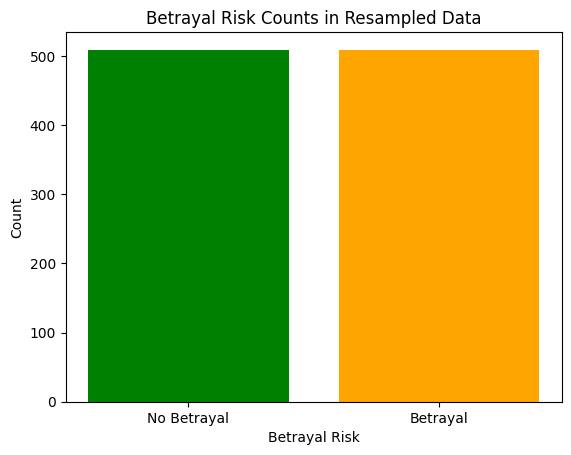

In [18]:
import matplotlib.pyplot as plt

# Get the value counts
betrayal_counts = y_train_resampled.value_counts()

# Define the labels and values for the graph
labels = ['No Betrayal', 'Betrayal']
values = [betrayal_counts.get(0, 0), betrayal_counts.get(1, 0)]

# Plot the bar graph
plt.bar(labels, values, color=['green', 'orange'])
plt.xlabel('Betrayal Risk')
plt.ylabel('Count')
plt.title('Betrayal Risk Counts in Resampled Data')
plt.show()
